In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd


Este script realiza un modelo de machine learning a partir de los datos de los puntos extraidos anteriormente transformados a un fichero csv

In [56]:
import pandas as pd

In [57]:
# sitios  = pd.read_csv(r"C:\Users\CRISTIAN\OneDrive - Universidad de Alcala\Classificaciones\training_sites_points_raster_value.csv", encoding = 'ISO-8859-1', index_col = [0], sep = ";")


In [58]:
sitios  = pd.read_csv(r"C:\Users\crist\Documents\GitHub\land_use_classification\sitios_entrenamiento_2021_lingue_reflex.csv", encoding = 'ISO-8859-1', index_col = [0], sep = ",")
sitios


,categoria,descrpcion,id_clase,geometry,B1,B2,B3,B4,B5,B6,B7
0,Plantacion,NaN,1.0,POINT (-73.11308347500469 -39.42803928687321),0.002125,0.004902,0.012630,0.007047,0.196165,0.039470,0.014692
1,Plantacion,NaN,1.0,POINT (-73.11296129010525 -39.428205109236735),0.003142,0.005123,0.012795,0.006800,0.217505,0.042550,0.015105
2,Plantacion,NaN,1.0,POINT (-73.1127431027848 -39.428205109236735),0.003142,0.005123,0.012795,0.006800,0.217505,0.042550,0.015105
3,Plantacion,NaN,1.0,POINT (-73.11281510460056 -39.42782873610897),0.002785,0.004655,0.012822,0.007212,0.198447,0.041725,0.015352
4,Plantacion,NaN,1.0,POINT (-73.1129874725837 -39.42774255211741),0.002785,0.004655,0.012822,0.007212,0.198447,0.041725,0.015352
...,...,...,...,...,...,...,...,...,...,...,...
684,NaN,NaN,6.0,POINT (-73.15821942536273 -39.451965724074356),0.004985,0.007240,0.016425,0.008587,0.010320,0.006112,0.004573
685,NaN,NaN,6.0,POINT (-73.14340176972097 -39.45305711564692),0.009000,0.010815,0.018570,0.013593,0.073542,0.032238,0.020303
686,NaN,NaN,6.0,POINT (-73.20807053264092 -39.44553718808514),-0.002907,0.003857,0.017717,0.011365,0.007075,0.008807,0.008313
687,NaN,NaN,6.0,POINT (-73.18515348804354 -39.447118725573525),0.002097,0.007625,0.020880,0.012960,0.009825,0.007240,0.005535


In [59]:
# Verificamos na
sitios.isna().sum()

categoria     587
descrpcion    677
id_clase        2
geometry        0
B1              0
B2              0
B3              0
B4              0
B5              0
B6              0
B7              0
dtype: int64

In [60]:
sitios = sitios.dropna(subset = ['id_clase'])
sitios.isna().sum()

categoria     585
descrpcion    675
id_clase        0
geometry        0
B1              0
B2              0
B3              0
B4              0
B5              0
B6              0
B7              0
dtype: int64

In [61]:
sitios_num = sitios.iloc[:,-7:]

# Machine Learning Clasification

In [65]:
sitios_num

,B1,B2,B3,B4,B5,B6,B7
0,0.002125,0.004902,0.012630,0.007047,0.196165,0.039470,0.014692
1,0.003142,0.005123,0.012795,0.006800,0.217505,0.042550,0.015105
2,0.003142,0.005123,0.012795,0.006800,0.217505,0.042550,0.015105
3,0.002785,0.004655,0.012822,0.007212,0.198447,0.041725,0.015352
4,0.002785,0.004655,0.012822,0.007212,0.198447,0.041725,0.015352
...,...,...,...,...,...,...,...
684,0.004985,0.007240,0.016425,0.008587,0.010320,0.006112,0.004573
685,0.009000,0.010815,0.018570,0.013593,0.073542,0.032238,0.020303
686,-0.002907,0.003857,0.017717,0.011365,0.007075,0.008807,0.008313
687,0.002097,0.007625,0.020880,0.012960,0.009825,0.007240,0.005535


# Debemos separar entre las etiquetas y los datos

In [63]:
# Separamos entre etiquetas y los datos
labels = sitios.loc[:,'id_clase']
features = sitios.loc[:,['B1','B2','B3','B4','B5','B6','B7']]

In [93]:
# En este paso seria interesante poder transformar los datos a un array con las mismas 
# dimensiones que las utilizadas en el otro script

labels_array = labels.values
labels_array.shape

(687,)

In [94]:
features_array = features.values
features_array.shape

(687, 7)

In [115]:
X_train_array,X_test_array, y_train_array, y_test_array = train_test_split(features_array,labels_array, test_size = 0.25, random_state = 42)

In [97]:
X_train,X_test, y_train, y_test = train_test_split(features,labels, test_size = 0.25, random_state = 42)

In [98]:
## Partimos por lo simple
dt = DecisionTreeClassifier(criterion= 'gini')
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [99]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [101]:
dt.feature_importances_


array([0.10151474, 0.25181986, 0.32520273, 0.19486343, 0.        ,
       0.01810396, 0.10849528])

In [102]:
features_names = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7']

In [103]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [104]:
dt.max_features_

7

In [105]:
## Validacion

y_pred = dt.predict(X_test)

In [106]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

confusion = confusion_matrix(y_test, y_pred)

In [107]:
confusion

array([[43,  3,  0,  0,  0,  0],
       [ 0, 46,  0,  0,  0,  0],
       [ 0,  1, 33,  0,  0,  1],
       [ 0,  0,  0, 16,  0,  0],
       [ 0,  0,  0,  0, 14,  0],
       [ 0,  1,  0,  0,  0, 14]], dtype=int64)

In [108]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion)

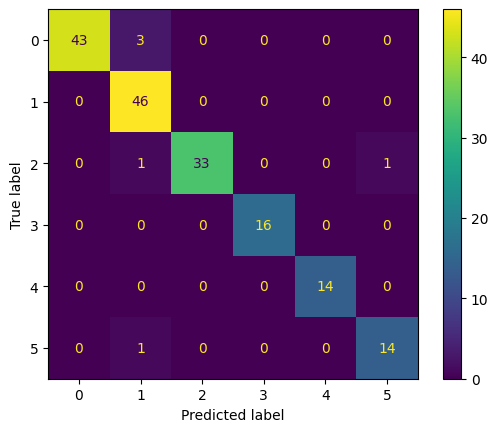

In [109]:
disp.plot()

## Buscando los hiperparametros.

In [110]:
param_distribution = {
    "n_estimators": [10,20,50,70,100],
    "max_features": ["sqrt","log2",None],
    "max_depth": [None, 10,20,30],
    "min_samples_split" : [2,4,8,10],
    "min_samples_leaf" : [1,2,4],
    "bootstrap" : [True, False]
}

In [111]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [112]:
# Can we transform this in a array
# Una de las formas podria ser transformar 

# X_train 
# X_train_array = X_train.to_numpy()
# X_test_array = X_test.to_numpy()


In [113]:
# y_train_array = y_train.to_numpy()
# y_test_array = y_test.to_numpy()

In [117]:
print(f'shape xtrain are {X_train.shape} and shape array X_train_array is {X_train_array.shape}')

shape xtrain are (515, 7) and shape array X_train_array is (515, 7)


In [118]:
X_train.iloc[1,:]

B1    0.063780
B2    0.070737
B3    0.092875
B4    0.102637
B5    0.109045
B6    0.130852
B7    0.117928
Name: 646, dtype: float64

In [119]:
X_train_array[1,:]

array([0.06378  , 0.0707375, 0.092875 , 0.1026375, 0.109045 , 0.1308525,
       0.1179275])

In [120]:
# Iniciamos el clasificador vacio

rfc = RandomForestClassifier(random_state = 42)
search = RandomizedSearchCV(rfc, param_distribution, n_iter = 10, cv = 5, random_state = 42)
search.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 8, 10],
                                        'n_estimators': [10, 20, 50, 70, 100]},
                   random_state=42)

In [121]:
# Iniciamos el clasificador vacio y lo entrenamos utilizando los array 
# como datos de entrada

rfc_np = RandomForestClassifier(random_state = 42)
search_np = RandomizedSearchCV(rfc_np, param_distribution, n_iter = 10, cv = 5, random_state = 42)
search_np.fit(X_train_array,y_train_array)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 8, 10],
                                        'n_estimators': [10, 20, 50, 70, 100]},
                   random_state=42)

In [124]:
search.best_estimator_

RandomForestClassifier(max_features=None, n_estimators=20, random_state=42)

In [130]:
search_np.best_estimator_

RandomForestClassifier(max_features=None, n_estimators=20, random_state=42)

In [132]:
best_model = search.best_estimator_
best_model

RandomForestClassifier(max_features=None, n_estimators=20, random_state=42)

In [133]:
best_model_np = search_np.best_estimator_
best_model_np

RandomForestClassifier(max_features=None, n_estimators=20, random_state=42)

In [134]:
best_params = search.best_params_
best_params

{'n_estimators': 20,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': None,
 'max_depth': None,
 'bootstrap': True}

In [135]:
best_params_np = search_np.best_params_
best_params_np

{'n_estimators': 20,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': None,
 'max_depth': None,
 'bootstrap': True}

In [136]:
from sklearn.metrics import make_scorer, accuracy_score, classification_report 

In [137]:
print(classification_report(y_train,search.predict(X_train)))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       146
         2.0       1.00      1.00      1.00       131
         3.0       1.00      1.00      1.00       111
         4.0       1.00      1.00      1.00        46
         5.0       1.00      1.00      1.00        55
         6.0       1.00      1.00      1.00        26

    accuracy                           1.00       515
   macro avg       1.00      1.00      1.00       515
weighted avg       1.00      1.00      1.00       515



In [143]:
print(classification_report(y_test, search.predict(X_test)))

              precision    recall  f1-score   support

         1.0       1.00      0.93      0.97        46
         2.0       0.90      1.00      0.95        46
         3.0       1.00      0.97      0.99        35
         4.0       1.00      0.94      0.97        16
         5.0       0.93      1.00      0.97        14
         6.0       1.00      0.93      0.97        15

    accuracy                           0.97       172
   macro avg       0.97      0.96      0.97       172
weighted avg       0.97      0.97      0.97       172



# Los resultados clasificados con los array



In [145]:
print(classification_report(y_train_array,search_np.predict(X_train_array)))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       146
         2.0       1.00      1.00      1.00       131
         3.0       1.00      1.00      1.00       111
         4.0       1.00      1.00      1.00        46
         5.0       1.00      1.00      1.00        55
         6.0       1.00      1.00      1.00        26

    accuracy                           1.00       515
   macro avg       1.00      1.00      1.00       515
weighted avg       1.00      1.00      1.00       515



In [150]:
print(classification_report(y_test_array,search_np.predict(X_test_array)))

              precision    recall  f1-score   support

         1.0       1.00      0.93      0.97        46
         2.0       0.90      1.00      0.95        46
         3.0       1.00      0.97      0.99        35
         4.0       1.00      0.94      0.97        16
         5.0       0.93      1.00      0.97        14
         6.0       1.00      0.93      0.97        15

    accuracy                           0.97       172
   macro avg       0.97      0.96      0.97       172
weighted avg       0.97      0.97      0.97       172



# vamos a hacer las predicciones a partir del modelo entrenadao con los puntos de entrenamiento. Utilizando los modelos entrados con los array

In [148]:
import rasterio 

In [151]:
from rasterio.plot import show
from rasterio.plot import show_hist
from matplotlib import pyplot as plt


import geopandas as gpd

Cargamos la informacion de la imagen satelital

In [156]:
# full_dataset = rasterio.open(r'C:\Users\CRISTIAN\OneDrive - Universidad de Alcala\Classificaciones\clipped_image_7b_ord.tif')

lingue_7b = rasterio.open(r'C:\Users\crist\Documents\GitHub\land_use_classification\lingue_basin_img_7b_ord_final.tif')
lingue_7b.crs

CRS.from_wkt('GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]')

In [157]:
# We will need a "X" matrix containing our features, and a "y" array containing our labels
print('Our X matrix is sized: {sz}'.format(sz=X_train_array.shape))
print('Our y array is sized: {sz}'.format(sz=y_train_array.shape))

Our X matrix is sized: (515, 7)
Our y array is sized: (515,)


# Tenemos que ajustar la imagen original a una dimension adecuada para utilizar el predict

In [165]:
from rasterio.plot import show
from rasterio.plot import show_hist
from rasterio.windows import Window
from rasterio.plot import reshape_as_raster, reshape_as_image
import numpy as np

In [166]:
# Leemos la imagen como un vector
lingue_7b_array = lingue_7b.read()  ## 
lingue_7b_array.shape

(7, 918, 1530)

In [168]:
### Debemos reemplazar los nan de las imagenes por 0

np.isnan(lingue_7b_array).sum()

4504122

In [169]:
lingue_7b_array = np.nan_to_num(lingue_7b_array, nan = 0.0)

In [170]:
# Reshape desde array a imagen
lingue_7b_image = reshape_as_image(lingue_7b_array)
print(lingue_7b_image.shape)

(918, 1530, 7)


In [171]:
# Volvemos hacer un reshape de a -1,7
class_prediction_search_np = search_np.predict(lingue_7b_image.reshape(-1,7))

In [181]:
class_prediction_matrix = class_prediction_search_np.reshape(lingue_7b_image[:,:,0].shape)
class_prediction_matrix.shape

(918, 1530)

In [187]:
type(class_prediction_matrix)

numpy.ndarray

In [182]:
def color_stretch(image, index):
    colors = image[:, :, index].astype(np.float64)
    for b in range(colors.shape[2]):
        colors[:, :, b] = rasterio.plot.adjust_band(colors[:, :, b])
    return colors
    
# find the highest pixel value in the prediction image
n = int(np.max(class_prediction_matrix))

# next setup a colormap for our map
colors = dict((
    (1, (52, 78, 31, 255)),   # Forest plantation - Darkgreen
    (2, (27,255, 1, 255)),      # Green - Native Forest
    (3, (1, 255, 214, 255)),    # Lightblue - Emergent Grassland
    (4, (255, 1, 1, 255)),      # Urbano 
    (5, (239, 255, 1, 255)),          # Suelo descubierto
    (6, (1, 18, 255, 255))      # Water
   
    
))

# Put 0 - 255 as float 0 - 1
for k in colors:
    v = colors[k]
    _v = [_v / 255.0 for _v in v]
    colors[k] = _v
    
index_colors = [colors[key] if key in colors else 
                (0, 0, 0, 255) for key in range(0, n+1)]

cmap = plt.matplotlib.colors.ListedColormap(index_colors, 'Classification', n+1)

C:\Users\crist\AppData\Local\Temp\ipykernel_17128\1414287830.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


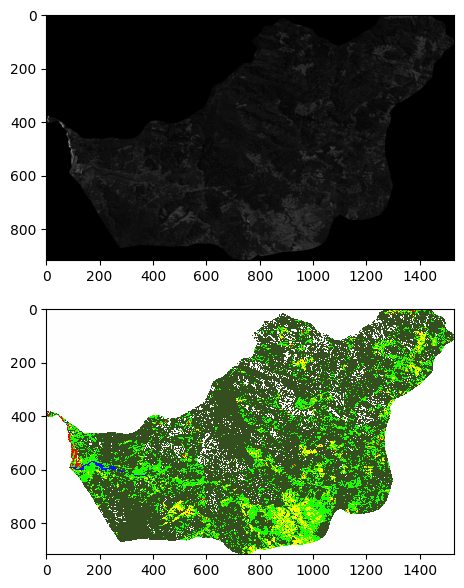

In [208]:
fig, axs = plt.subplots(2,1,figsize=(10,7))

img_stretched = color_stretch(lingue_7b_image, [2, 2, 2])
axs[0].imshow(img_stretched)

axs[1].imshow(class_prediction_matrix, cmap=cmap, interpolation='none')

fig.show()

In [207]:
class_prediction_matrix.dtype

dtype('int8')

In [202]:
# Assuming 'class_prediction_matrix' is your numpy array
class_prediction_matrix = class_prediction_matrix.astype(np.int8)

Exportar A tif usando rasterio (OTras formas usando fifffile library existen tambien)

In [214]:
import numpy as np
import rasterio
from rasterio.transform import from_origin

In [204]:
# Array
print(class_prediction_matrix.shape)

(918, 1530)


In [205]:
# define the transformation

transform = from_origin(0,918,1,1)



In [218]:
# Define the metada

metadata = {
    'driver': 'GTiff',
    'height': class_prediction_matrix.shape[0],
    'weight': class_prediction_matrix.shape[1],
    'count': 1,
    'dtype' : class_prediction_matrix.dtype,
    'crs': '+proj=latlong',
    'transform':transform,
}

# Save the a TIFF file

with rasterio.open('class_prediction.tif','w', **metadata) as dst:
    dst.write(class_prediction_matrix,1)


TypeError: Integer width and height are required.

In [223]:
# No permite asignar crs ni tampoco transformaciones

from tifffile import imsave

# Save to Tiff
imsave('clasificacion_lingue_rf_first.tif', class_prediction_matrix)


C:\Users\crist\AppData\Local\Temp\ipykernel_17128\1729834429.py:6: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  imsave('clasificacion_lingue_rf_first.tif', class_prediction_matrix)
